Objetivo:

Realizar Arbol de decisión en 2D: Para NII.    
Para los datos preetiquetados: 12.45% Pre-etiquetadas - 158 galaxias, se van a dividir así:  
54% = Datos de entrenamiento = 85 Datos.  
46% = Datos para tomar la exactitud = 73 Datos.  

* 0. Traer Datos Pre-etiqDeBase: Con 1269 Observaciones en Visual e infrarrojo. 
* 1. Hacer Arbol de decisión= 'Ejex_NH', 'Ejey_OHB'.
* 2. Medición de exatitud con el 40% restante de los datos. 
* 3. Realizar gráfica.

## 0. Datos:

In [1]:
import numpy as np
import pandas as pd
import time
from datetime import date
import warnings
warnings.filterwarnings 
import astropy.units as u
from astropy.table import Table
from astroquery.sdss import SDSS
from array import array
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
FusionData = pd.read_csv('C:/Users/Cristina Quiazúa M/Desktop/MyBPT/Results/3. Paquete de ML/Mydata.csv')

In [3]:
FusionData[0:5]

,ra_sdss,dec_sdss,ra_iras,dec_iras,specobjid,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,...,fnu_100,rat_12_25,rat_25_60,rat_60_100,Ejey_OHb,Ejex_NH,Ejex_SH,Ejex_OH,Log_12_25,EtiqRef
0,145.51241,0.339171,145.51395,0.337522,299595780317014016,0.006379,153.8173,35.59267,3.656026,13.19764,...,15.08,0.700000,0.096899,0.342175,-2.275763,-1.065383,-1.694790,-5.024607,-0.356675,NaN
1,167.23240,0.444804,167.23460,0.444661,313129123717343232,0.012902,10285.9400,3250.79100,6074.062000,578.00410,...,1.01,1.555556,0.329268,0.811881,0.625129,-1.488608,-1.481473,-4.039606,0.441833,NaN
2,169.70646,0.619308,169.70757,0.617749,314283887213701120,0.025391,528.2295,139.90980,34.019120,62.50361,...,1.79,0.500000,0.666667,0.418994,-1.414075,-0.743963,-1.261980,-3.489259,-0.693147,NaN
3,170.82587,-0.922475,170.82668,-0.921258,315274540949202944,0.008394,998.6539,263.62670,358.444700,54.00912,...,2.83,0.591837,0.401639,0.431095,0.307240,-1.526911,-1.179064,-3.498782,-0.524524,NaN
4,169.38707,-0.187502,169.38559,-0.186404,315334739210823680,0.040338,520.6220,74.79313,28.152840,74.78139,...,2.10,0.813953,0.632353,0.323810,-0.977078,-0.550111,-1.223666,-2.962311,-0.205852,Infrarroja


In [4]:
conteoEtiqRef = FusionData['EtiqRef'].value_counts()
conteoEtiqRef

Infrarroja    75
Seyfert       60
LINER         23
Name: EtiqRef, dtype: int64

In [5]:
grupo1 = FusionData.sample(frac=0.6, random_state=1)
grupo2 = FusionData.drop(grupo1.index)

In [6]:
FusionData['EtiqRef60%'] = grupo1['EtiqRef']
FusionData['EtiqRef40%'] = grupo2['EtiqRef']

In [7]:
FusionData[0:50]

,ra_sdss,dec_sdss,ra_iras,dec_iras,specobjid,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,...,rat_25_60,rat_60_100,Ejey_OHb,Ejex_NH,Ejex_SH,Ejex_OH,Log_12_25,EtiqRef,EtiqRef60%,EtiqRef40%
0,145.51241,0.339171,145.51395,0.337522,299595780317014016,0.006379,153.81730,35.59267,3.656026,13.19764,...,0.096899,0.342175,-2.275763,-1.065383,-1.694790,-5.024607,-0.356675,NaN,NaN,NaN
1,167.23240,0.444804,167.23460,0.444661,313129123717343232,0.012902,10285.94000,3250.79100,6074.062000,578.00410,...,0.329268,0.811881,0.625129,-1.488608,-1.481473,-4.039606,0.441833,NaN,NaN,NaN
2,169.70646,0.619308,169.70757,0.617749,314283887213701120,0.025391,528.22950,139.90980,34.019120,62.50361,...,0.666667,0.418994,-1.414075,-0.743963,-1.261980,-3.489259,-0.693147,NaN,NaN,NaN
3,170.82587,-0.922475,170.82668,-0.921258,315274540949202944,0.008394,998.65390,263.62670,358.444700,54.00912,...,0.401639,0.431095,0.307240,-1.526911,-1.179064,-3.498782,-0.524524,NaN,NaN,NaN
4,169.38707,-0.187502,169.38559,-0.186404,315334739210823680,0.040338,520.62200,74.79313,28.152840,74.78139,...,0.632353,0.323810,-0.977078,-0.550111,-1.223666,-2.962311,-0.205852,Infrarroja,NaN,Infrarroja
5,174.63863,-1.184506,174.63847,-1.185926,317517270093948928,0.020766,751.45690,143.59610,33.897810,115.31870,...,0.580645,0.397436,-1.443654,-0.483970,-1.401166,-3.701707,-0.364643,NaN,NaN,NaN
6,175.55166,0.334081,175.55125,0.334228,318736634008856576,0.018554,22370.13000,6118.43800,14895.770000,1138.57800,...,0.218509,0.862528,0.889770,-1.587602,-1.703117,-3.987232,-1.223775,NaN,NaN,NaN
7,188.79549,-0.222256,188.79780,-0.223141,326576151612909568,0.022632,248.19510,69.47137,15.853010,30.81394,...,0.545455,0.395210,-1.477555,-0.695904,-1.345013,-4.015528,-0.364643,NaN,NaN,NaN
8,191.38328,-0.535715,191.38354,-0.537677,328847737065859072,0.005419,249.26120,81.97454,94.462960,18.33531,...,0.847222,0.467532,0.141799,-1.219329,-1.062478,-2.650609,-0.891998,NaN,NaN,NaN
9,195.24442,-0.027538,195.24472,-0.028736,329909322001704960,0.003959,5141.77700,1367.65800,472.858000,562.43300,...,0.177419,0.371814,-1.062060,-0.822538,-1.262660,-4.288627,0.769687,NaN,NaN,NaN


### División por grupos EtiqRef 60% y 40%

In [8]:
conteoEtiqRef60 = FusionData['EtiqRef60%'].value_counts()
conteoEtiqRef60

Infrarroja    43
Seyfert       27
LINER         15
Name: EtiqRef60%, dtype: int64

In [9]:
conteoEtiqRef40 = FusionData['EtiqRef40%'].value_counts()
conteoEtiqRef40

Seyfert       33
Infrarroja    32
LINER          8
Name: EtiqRef40%, dtype: int64

## 1. Hacer Arboles de Decision para X = 'Ejex_NH', 'Ejey_OHb'.

In [10]:
datos_entrenamiento = FusionData.dropna(subset=['EtiqRef60%'])
len(datos_entrenamiento)

85

In [11]:
# Divide los datos de entrenamiento en características (X) y etiquetas (y):
X_entrenamiento = datos_entrenamiento[['Ejex_NH', 'Ejey_OHb']]
y_entrenamiento = datos_entrenamiento['EtiqRef60%']

In [12]:
# Crea un clasificador de árboles de decisión y ajústalo a los datos de entrenamiento:
arbol_decision = DecisionTreeClassifier()
arbol_decision.fit(X_entrenamiento, y_entrenamiento)

DecisionTreeClassifier()

In [13]:
datos_restantes = FusionData[['Ejex_NH', 'Ejey_OHb']]
datos_restantes[0:5]

,Ejex_NH,Ejey_OHb
0,-1.065383,-2.275763
1,-1.488608,0.625129
2,-0.743963,-1.414075
3,-1.526911,0.307240
4,-0.550111,-0.977078


In [14]:
predicciones = arbol_decision.predict(datos_restantes)

In [15]:
predicciones 

array(['Infrarroja', 'Infrarroja', 'Infrarroja', ..., 'Infrarroja',
       'Infrarroja', 'Infrarroja'], dtype=object)

In [16]:
len(predicciones)

1269

In [17]:
# Añadir la columna de clusters al DataFrame original
FusionData["PredictN"] = predicciones
FusionData[0:5]

,ra_sdss,dec_sdss,ra_iras,dec_iras,specobjid,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,...,rat_60_100,Ejey_OHb,Ejex_NH,Ejex_SH,Ejex_OH,Log_12_25,EtiqRef,EtiqRef60%,EtiqRef40%,PredictN
0,145.51241,0.339171,145.51395,0.337522,299595780317014016,0.006379,153.8173,35.59267,3.656026,13.19764,...,0.342175,-2.275763,-1.065383,-1.694790,-5.024607,-0.356675,NaN,NaN,NaN,Infrarroja
1,167.23240,0.444804,167.23460,0.444661,313129123717343232,0.012902,10285.9400,3250.79100,6074.062000,578.00410,...,0.811881,0.625129,-1.488608,-1.481473,-4.039606,0.441833,NaN,NaN,NaN,Infrarroja
2,169.70646,0.619308,169.70757,0.617749,314283887213701120,0.025391,528.2295,139.90980,34.019120,62.50361,...,0.418994,-1.414075,-0.743963,-1.261980,-3.489259,-0.693147,NaN,NaN,NaN,Infrarroja
3,170.82587,-0.922475,170.82668,-0.921258,315274540949202944,0.008394,998.6539,263.62670,358.444700,54.00912,...,0.431095,0.307240,-1.526911,-1.179064,-3.498782,-0.524524,NaN,NaN,NaN,Infrarroja
4,169.38707,-0.187502,169.38559,-0.186404,315334739210823680,0.040338,520.6220,74.79313,28.152840,74.78139,...,0.323810,-0.977078,-0.550111,-1.223666,-2.962311,-0.205852,Infrarroja,NaN,Infrarroja,Infrarroja


In [18]:
conteoPredictN = FusionData['PredictN'].value_counts()
conteoPredictN

Infrarroja    1123
LINER           86
Seyfert         60
Name: PredictN, dtype: int64

## 2. Medición de exactitud con Frecuencia cruzada

In [19]:
tabla_frecuencias = pd.crosstab(FusionData['EtiqRef40%'], FusionData['PredictN'], margins=True, margins_name="Total")
tabla_frecuencias

PredictN,Infrarroja,LINER,Seyfert,Total
EtiqRef40%,,,,
Infrarroja,32,0,0,32
LINER,0,8,0,8
Seyfert,1,3,29,33
Total,33,11,29,73


In [20]:
# Para obtener las cantidades de coincidencias específicas, puedes acceder a los valores en la tabla
coincidencias_infrarroja = tabla_frecuencias.loc['Infrarroja', 'Infrarroja']
coincidencias_seyfert = tabla_frecuencias.loc['Seyfert', 'Seyfert']
coincidencias_liner = tabla_frecuencias.loc['LINER', 'LINER']

print("Coincidencias Infrarroja:", coincidencias_infrarroja)
print("Coincidencias Seyfert:", coincidencias_seyfert)
print("Coincidencias LINER:", coincidencias_liner)

Coincidencias Infrarroja: 32
Coincidencias Seyfert: 29
Coincidencias LINER: 8


### Cálculos

In [21]:
# Calcula los verdaderos positivos, falsos positivos, falsos negativos y verdaderos negativos
verdaderos_positivos = tabla_frecuencias.loc['Infrarroja', 'Infrarroja']
falsos_positivos = tabla_frecuencias.loc['Total', 'Infrarroja'] - verdaderos_positivos
falsos_negativos = tabla_frecuencias.loc['Infrarroja', 'Total'] - verdaderos_positivos
verdaderos_negativos = tabla_frecuencias.loc['Total', 'Total'] - verdaderos_positivos - falsos_positivos - falsos_negativos

In [22]:
# Calcula la Precisión
precision = verdaderos_positivos / (verdaderos_positivos + falsos_positivos)
# Calcula la Sensibilidad
sensibilidad = verdaderos_positivos / (verdaderos_positivos + falsos_negativos)

In [23]:
# Calcula los Falsos Positivos y Falsos Negativos
falsos_positivos = falsos_positivos / (falsos_positivos + verdaderos_negativos)
falsos_negativos = falsos_negativos / (falsos_negativos + verdaderos_positivos)

In [24]:
# Imprime los resultados
print("Precisión:", precision)
print("Sensibilidad:", sensibilidad)
print("Falsos Positivos:", falsos_positivos)
print("Falsos Negativos:", falsos_negativos)

Precisión: 0.9696969696969697
Sensibilidad: 1.0
Falsos Positivos: 0.024390243902439025
Falsos Negativos: 0.0


## 3. Realizar gráfica

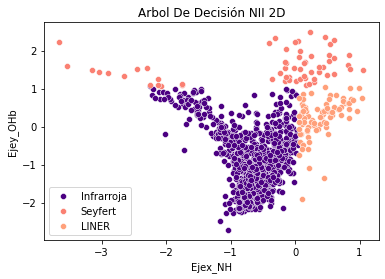

In [25]:
infrarroja_df = FusionData[FusionData['PredictN'] == 'Infrarroja']
seyfert_df = FusionData[FusionData['PredictN'] == 'Seyfert']
liner_df = FusionData[FusionData['PredictN'] == 'LINER']

sns.scatterplot(data=infrarroja_df, x='Ejex_NH', y='Ejey_OHb', color='indigo', label='Infrarroja', marker='o')
sns.scatterplot(data=seyfert_df, x='Ejex_NH', y='Ejey_OHb', color='salmon', label='Seyfert', marker='o')
sns.scatterplot(data=liner_df, x='Ejex_NH', y='Ejey_OHb', color='lightsalmon', label='LINER', marker='o')

plt.xlabel('Ejex_NH')
plt.ylabel('Ejey_OHb')
plt.title('Arbol De Decisión NII 2D')
plt.legend()
plt.show()

# Conclusiones:    

## 2. Medición: 97%

In [26]:
X_entrenamiento 

,Ejex_NH,Ejey_OHb
26,0.346341,0.470202
27,0.048948,2.253501
58,-0.475273,-1.304664
59,0.539943,2.173212
60,-0.528763,-1.502932
...,...,...
1209,0.135868,1.670595
1214,0.137925,1.339249
1233,0.574864,0.375824
1235,0.211607,1.123534


In [27]:
y_entrenamiento

26           LINER
27         Seyfert
58      Infrarroja
59         Seyfert
60      Infrarroja
           ...    
1209       Seyfert
1214       Seyfert
1233         LINER
1235       Seyfert
1246    Infrarroja
Name: EtiqRef60%, Length: 85, dtype: object

In [30]:
FusionData['EtiqRef40%']

0              NaN
1              NaN
2              NaN
3              NaN
4       Infrarroja
           ...    
1264           NaN
1265         LINER
1266           NaN
1267           NaN
1268           NaN
Name: EtiqRef40%, Length: 1269, dtype: object